### 04.3 神经网络法
<img src="https://microsoft.github.io/ai-edu/%E5%9F%BA%E7%A1%80%E6%95%99%E7%A8%8B/A2-%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C%E5%9F%BA%E6%9C%AC%E5%8E%9F%E7%90%86/%E7%AC%AC2%E6%AD%A5%20-%20%E7%BA%BF%E6%80%A7%E5%9B%9E%E5%BD%92/img/4/Setup.png">

#### 定义神经网络类
我们定义一个类，用来实现神经网络的训练和推理过程。首先初始化构造函数，设置内部变量学习率$eta$，和$w,b$的初始值0

In [148]:
class NeuralNet_0_1(object):
    def __init__(self, eta):
        self.eta = eta
        self.w = 0
        self.b = 0

然后实现它的前向计算过程$$z_i = x_i \cdot w + b$$

In [149]:
def __forward(self, x):
    z = x * self.w + self.b
    return z
NeuralNet_0_1.__forward = __forward 

实现反向传播，根据梯度下降的公式  
计算 $w$ 的梯度
$$
{\partial{loss} \over \partial{w}} = \frac{\partial{loss}}{\partial{z_i}}\frac{\partial{z_i}}{\partial{w}}=(z_i-y_i)x_i
$$

计算 $b$ 的梯度
$$
\frac{\partial{loss}}{\partial{b}} = \frac{\partial{loss}}{\partial{z_i}}\frac{\partial{z_i}}{\partial{b}}=z_i-y_i
$$

In [150]:
def __backward(self, x,y,z):
    dz = z - y
    db = dz
    dw = x * dz
    return dw, db
NeuralNet_0_1.__backward = __backward

内部函数用来更新$w,b$的值

In [151]:
def __update(self, dw, db):
    self.w = self.w - self.eta * dw
    self.b = self.b - self.eta * db
NeuralNet_0_1.__update = __update

开始训练

In [152]:
def train(self, dataReader):
    for i in range(dataReader.num_train):
        #获取x,y的一个值
        x,y = dataReader.GetSingleTrainSample(i)
        #进行前向计算，获取z值
        z = self.__forward(x)
        #进行反向传播，获取w,b的梯度
        dw, db = self.__backward(x, y, z)
        #更新w,b值
        self.__update(dw, db)
NeuralNet_0_1.train = train

推理过程，实现一个前向计算过程用来获取预测值

In [153]:
def inference(self, x):
    return self.__forward(x)
NeuralNet_0_1.inference = inference

#### 代码实现
初始化，读取数据，实例化神经网络类，学习率设置为0.1

In [154]:
import numpy as np
import matplotlib.pyplot as plt
from HelperClass.DataReader_1_0 import *
file_name = "ch04.npz"
sdr = DataReader_1_0(file_name)
sdr.ReadData()
eta = 0.1
net = NeuralNet_0_1(eta)

开始训练

In [155]:
net.train(sdr)
print("w=%f,b=%f" %(net.w, net.b))

w=1.882389,b=3.097748


预测在$x=1.346$的情况下的输出

In [156]:
result = net.inference(1.346)
print("result=", result)

result= [5.63144342]


#### 结果可视化

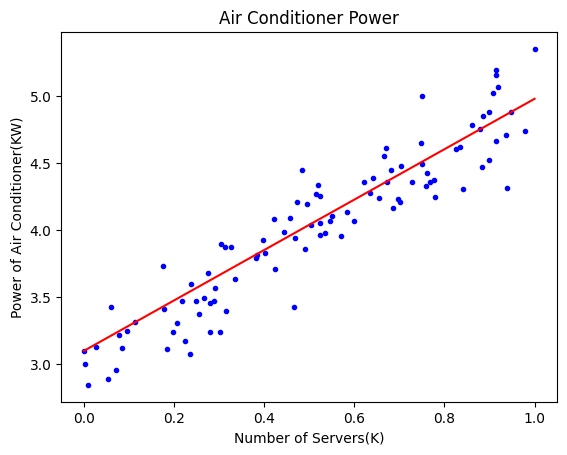

In [157]:
def ShowResult(net, dataReader):
    X,Y = dataReader.GetWholeTrainSamples()
    # draw sample data
    plt.plot(X, Y, "b.")
    # draw predication data
    PX = np.linspace(0,1,10)
    PZ = net.inference(PX)
    plt.plot(PX, PZ, "r")
    plt.title("Air Conditioner Power")
    plt.xlabel("Number of Servers(K)")
    plt.ylabel("Power of Air Conditioner(KW)")
    plt.show()
ShowResult(net, sdr)